In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from matplotlib import pyplot as plt
%matplotlib inline

In [26]:
data = pd.read_csv("AirPassengers.csv", parse_dates = ['Month'], index_col = 'Month', header = 0)

In [27]:
data.head(2)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118


In [30]:
data.shape

(144, 1)

In [38]:
TRAIN_SIZE = 120
TEST_SIZE = data.size - TRAIN_SIZE
TEST_SIZE

24

In [468]:
data_train = data.iloc[0:TRAIN_SIZE]
data_train.size
data_test = data.iloc[TRAIN_SIZE:]
data_test.size

24

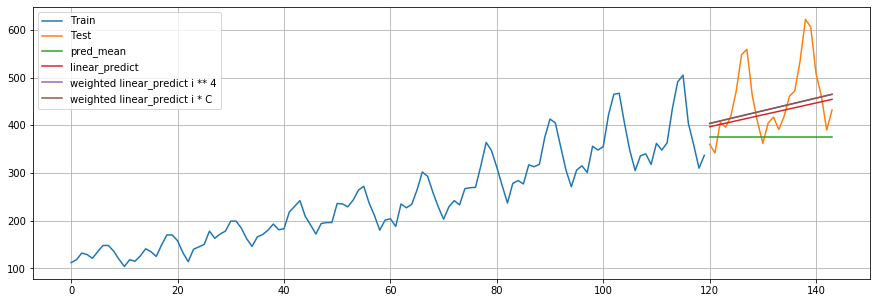

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(range(data_train.size), data_train, label = 'Train')
ax.plot(range(data_train.size, data.size), data_test, label = 'Test')
ax.plot(range(data_train.size, data.size), pred_mean, label = 'pred_mean')
ax.plot(range(data_train.size, data.size), lr_predict, label = 'linear_predict')
ax.plot(range(data_train.size, data.size), wlr_predict, label = 'weighted linear_predict i ** 4')
ax.plot(range(data_train.size, data.size), wwlr_predict, label = 'weighted linear_predict i * C')
plt.legend()
ax.grid()

In [55]:
pred_mean = [data_train.values[-24:].mean()] * TEST_SIZE

In [458]:
# Defino metricas de evaluacion

def mae(y_real, y_pred):
    return np.abs(y_real-y_pred).mean()

def mse(y_real, y_pred):
    return ((y_real - y_pred)**2).mean()

def rmse(y_real, y_pred):
    return np.sqrt(((y_real - y_pred)**2).mean())

def mape(y_real, y_pred):
    return np.abs((y_real - y_pred)/y_real).mean()*100

In [152]:
print("MAE de pred_mean = ", mae(data_test.values, pred_mean))
print("RMSE de pred_mean = ",rmse(data_test.values, pred_mean))
print("MAPE de pred_mean = ", mape(data_test.values, pred_mean), "\n")

print("MAE de linear_predict = ", mae(data_test.values, lr_predict))
print("RMSE de linear_predict = ",rmse(data_test.values, lr_predict))
print("MAPE de linear_predict = ", mape(data_test.values, lr_predict), "\n")

print("MAE de wlinear_predict (i^4) = ", mae(data_test.values, wlr_predict))
print("RMSE de wlinear_predict (i^4) = ",rmse(data_test.values, wlr_predict))
print("MAPE de wlinear_predict (i^4) = ", mape(data_test.values, wlr_predict),'\n')

print("MAE de wwlinear_predict (i*C) = ", mae(data_test.values, wwlr_predict))
print("RMSE de wwlinear_predict (i*C) = ",rmse(data_test.values, wwlr_predict))
print("MAPE de wwlinear_predict (i*C) = ", mape(data_test.values, wwlr_predict))

MAE de pred_mean =  82.55208333333336
RMSE de pred_mean =  107.6540643424318
MAPE de pred_mean =  16.4562384729109 

MAE de linear_predict =  54.93759857937666
RMSE de linear_predict =  74.787758856445
MAPE de linear_predict =  11.21507247006756 

MAE de wlinear_predict (i^4) =  54.36746314826572
RMSE de wlinear_predict (i^4) =  71.98087346439708
MAPE de wlinear_predict (i^4) =  11.32277284810026 

MAE de wwlinear_predict (i*C) =  54.335506624557645
RMSE de wwlinear_predict (i*C) =  71.92907280647327
MAPE de wwlinear_predict (i*C) =  11.318690089567333


In [75]:
from sklearn.linear_model import LinearRegression

In [78]:
x_train = np.array(range(data_train.size)).reshape(-1, 1)
x_test = np.array(range(data_train.size, data.size)).reshape(-1, 1)

In [80]:
model = LinearRegression()
model.fit(x_train, data_train)
lr_predict = model.predict(x_test)

In [105]:
model2 = LinearRegression()
model2.fit(x_train, data_train, sample_weight = [i ** 4 for i in x_train.squeeze()])
wlr_predict = model2.predict(x_test)

In [151]:
model3 = LinearRegression()
C= 10
model3.fit(x_train, data_train, sample_weight = [i for i in x_train.squeeze()])
wwlr_predict = model3.predict(x_test)

In [178]:
train11 = scipy.stats.boxcox(data_train.values.squeeze())[0]
train11

array([5.79468345, 5.87253039, 6.04094156, 6.00627921, 5.91010377,
       6.0748899 , 6.21444576, 6.21444576, 6.0860526 , 5.88515108,
       5.6847213 , 5.87253039, 5.83407188, 5.9708707 , 6.14076303,
       6.0748899 , 5.95889617, 6.22471021, 6.42686613, 6.42686613,
       6.31435317, 6.05233548, 5.82104804, 6.12996465, 6.18326683,
       6.23491177, 6.4979007 , 6.36215353, 6.44490725, 6.4979007 ,
       6.67131883, 6.67131883, 6.54928297, 6.3527019 , 6.19372491,
       6.39019317, 6.43591084, 6.51520204, 6.62354992, 6.52378681,
       6.54082682, 6.81433825, 6.89889203, 6.9794986 , 6.74807813,
       6.60732443, 6.44490725, 6.63160501, 6.64760176, 6.64760176,
       6.93966451, 6.9329355 , 6.89200211, 6.98604952, 7.11820861,
       7.16603388, 6.94636746, 6.76302532, 6.51520204, 6.68694898,
       6.71012922, 6.58269209, 6.9329355 , 6.8781392 , 6.92618022,
       7.11820861, 7.33459913, 7.28570222, 7.08763934, 6.89200211,
       6.70243736, 6.89200211, 6.9794986 , 6.91939845, 7.13629

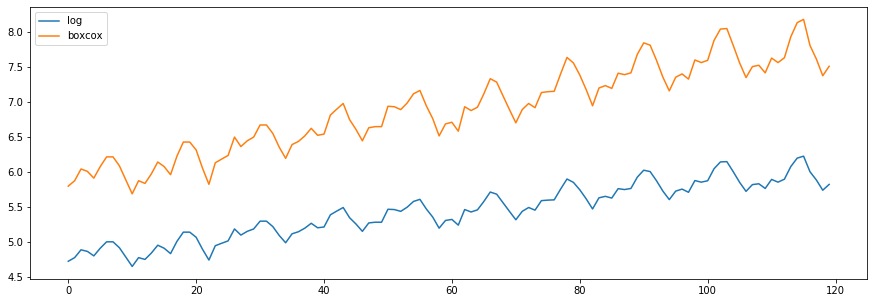

In [181]:
# Descomposición de serie temporal
train1 = np.log(data_train)
train11 = scipy.stats.boxcox(data_train.values.squeeze())[0] 


fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(x_train, train1, label="log")
ax.plot(x_train, np.array(train11).reshape(-1,1), label="boxcox")
plt.legend()


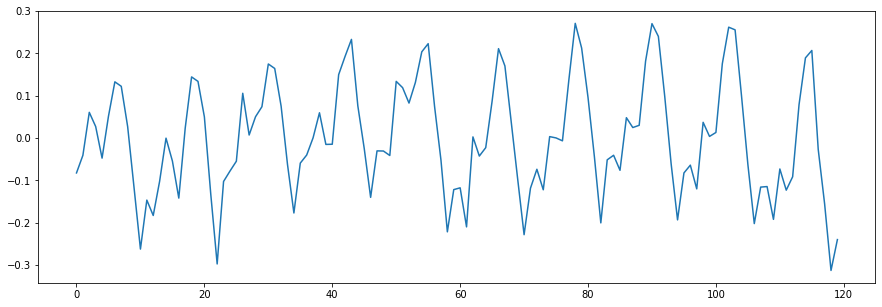

In [191]:
# Para la tendencia tengo estas opciones:
# A) Aplicar regresion lineal directamente

obj = LinearRegression()
obj.fit(x_train, train1)
tendencia = obj.predict(x_train)
train2 = train1 - tendencia
fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(x_train, train2)



In [198]:

np.corrcoef(tr2arr[1:], tr2arr[:-1])

array([[1.        , 0.68636708],
       [0.68636708, 1.        ]])

In [217]:
# Para identificar el patrón
tr2arr = train2.values.squeeze()
corvec = []
for i in range(1, 24):
    cor = np.corrcoef(tr2arr[i:], tr2arr[:-i])
    corvec.append(cor[1, 0])
np.argmax(corvec)
#Elemento será el np.argmax + 1.

11

In [235]:
corvec[:12]

[0.6863670843761102,
 0.24118928605834222,
 -0.11223687835356673,
 -0.3618983682828932,
 -0.3829254494755654,
 -0.35103646433472546,
 -0.37907570487847486,
 -0.3548787405298607,
 -0.11279566504383941,
 0.20158460153843621,
 0.596661799000912,
 0.8777294256508061]

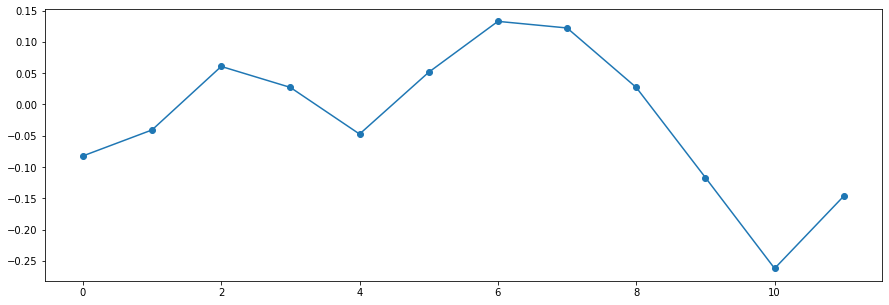

In [287]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(x_train[:12], train2[:12], 'o-')  #En realidad deberia hacer hasta 13 para coger el punto 12
                                          #Pero no quiero porque forma parte del siguiente periodo


In [375]:
matrix = np.zeros((0, 12))
#fig, ax = plt.subplots(1, 1, figsize=(15,5))
for i in range(10):
    if i > 3:
        matrix = np.append(matrix, train2.values.squeeze()[(12*i): (12*i + 12)].reshape(1,-1),
                           axis = 0)
        #ax.plot(x_train[:12], train2.values.squeeze[(12*i): (12*i + 12)], '-')

In [381]:
vec = []
#fig, ax = plt.subplots(1, 1, figsize=(15,5))
for i in range(10):
    if i > 3:
        vec.append(train2.values.squeeze()[(12*i): (12*i + 12)])
                           

In [411]:
season_med = pd.DataFrame(vec).apply(np.median, axis = 0).values
season_mean = pd.DataFrame(vec).apply(np.mean, axis = 0).values

In [424]:
season_full = np.tile(season_med, 10)
season_full2 = np.tile(season_mean, 10)

In [427]:
train3 = train2.values.squeeze() - season_full

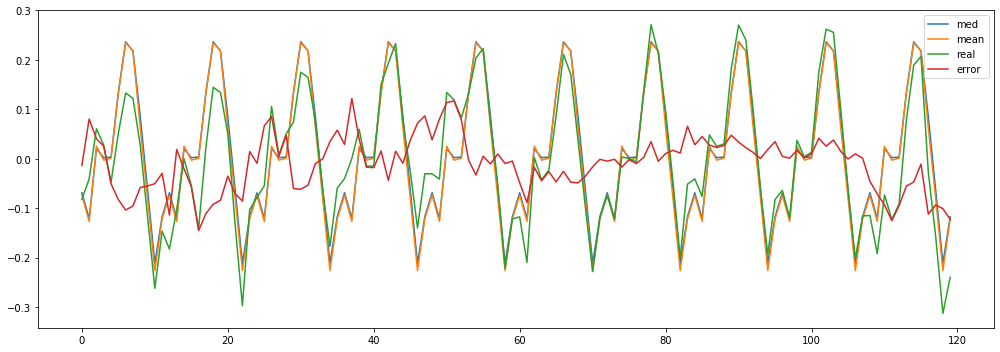

In [428]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
ax.plot(x_train, season_full, label="med")
ax.plot(x_train, season_full2, label = "mean")
ax.plot(x_train, train2, label= "real")
ax.plot(x_train, train3, label= "error")
plt.legend()
plt.tight_layout()


In [429]:
error = train3


In [431]:
#Genero error
mu, sigma = scipy.stats.norm.fit(error)
mu, sigma

(-0.009949636889036466, 0.05457720149508684)

In [432]:
err_gen = np.random.normal(mu, sigma, size= data_test.size)

In [443]:
#Recupero nuestra funcion en test

prediction = np.exp(err_gen +season_full[:x_test.size] + obj.predict(x_test).squeeze())

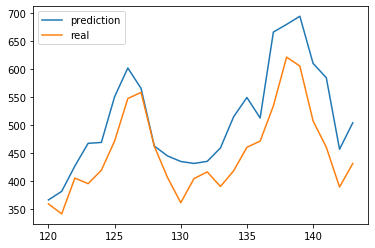

In [444]:
fig, ax = plt.subplots()
ax.plot(x_test, prediction, label = "prediction")
ax.plot(x_test, data_test, label = "real")
ax.legend()

In [784]:
print("MAE de pred_mean = ", mae(data_test.values.squeeze(), pred_mean))
print("RMSE de pred_mean = ",rmse(data_test.values.squeeze(), pred_mean), '\n')
#print("MAPE de pred_mean = ", mape(data_test.values.squeeze(), pred_mean), "\n")

print("MAE de linear_predict = ", mae(data_test.values.squeeze(), lr_predict))
print("RMSE de linear_predict = ",rmse(data_test.values.squeeze(), lr_predict), '\n')
#print("MAPE de linear_predict = ", mape(data_test.values.squeeze(), lr_predict), "\n")

print("MAE de wwlinear_predict (i*C) = ", mae(data_test.values.squeeze(), wwlr_predict))
print("RMSE de wwlinear_predict (i*C) = ",rmse(data_test.values.squeeze(), wwlr_predict), '\n')
#print("MAPE de wwlinear_predict (i*C) = ", mape(data_test.values.squeeze(), wwlr_predict), '\n')

print("MAE de descomp_predict = ", mae(data_test.values.squeeze(), prediction))
print("RMSE de descomp_predict = ",rmse(data_test.values.squeeze(), prediction), '\n')
#print("MAPE de descomp_predict = ", mape(data_test.values.squeeze(), prediction), '\n')

print("MAE de descomp_predict_best = ", mae(data_test.values.squeeze(), best_prediction))
print("RMSE de descomp_predict_best = ",rmse(data_test.values.squeeze(), best_prediction), '\n')
#print("MAPE de descomp_predict_best = ", mape(data_test.values.squeeze(), best_prediction))

print("MAE de descomp_predict_best2 = ", mae(data_test.values.squeeze(), best_prediction2))
print("RMSE de descomp_predict_best2 = ",rmse(data_test.values.squeeze(), best_prediction2), '\n')
#print("MAPE de descomp_predict_best = ", mape(data_test.values.squeeze(), best_prediction))

print("MAE de descomp_predict_method= ", mae(data_test.values.squeeze(), prediction_method))
print("RMSE de descomp_predict_method = ",rmse(data_test.values.squeeze(), prediction_method))
#print("MAPE de descomp_predict_best = ", mape(data_test.values.squeeze(), best_prediction))

MAE de pred_mean =  82.55208333333336
RMSE de pred_mean =  107.65406434243181 

MAE de linear_predict =  61.05423362411999
RMSE de linear_predict =  81.16811738354872 

MAE de wwlinear_predict (i*C) =  60.69110903384559
RMSE de wwlinear_predict (i*C) =  78.97321834878974 

MAE de descomp_predict =  57.242273151173315
RMSE de descomp_predict =  72.97264453088304 

MAE de descomp_predict_best =  42.40006581878328
RMSE de descomp_predict_best =  44.93684220107083 

MAE de descomp_predict_best2 =  42.08066033374951
RMSE de descomp_predict_best2 =  44.38518655292437 

MAE de descomp_predict_method=  53.1940773081821
RMSE de descomp_predict_method =  56.49989486941434


In [451]:
data_test.values.squeeze() - pred_mean

array([-14.70833333, -32.70833333,  31.29166667,  21.29166667,
        45.29166667,  97.29166667, 173.29166667, 184.29166667,
        88.29166667,  32.29166667, -12.70833333,  30.29166667,
        42.29166667,  16.29166667,  44.29166667,  86.29166667,
        97.29166667, 160.29166667, 247.29166667, 231.29166667,
       133.29166667,  86.29166667,  15.29166667,  57.29166667])

In [452]:
data_test.values.squeeze() - prediction

array([  -6.97742258,  -40.22585268,  -21.56176002,  -72.05389217,
        -49.61568872,  -79.16786275,  -54.53977572,   -7.14755591,
         -0.28794549,  -38.55219392,  -73.62303665,  -27.09160921,
        -18.83915035,  -68.81453055,  -96.63593855,  -88.85479696,
        -41.294542  , -131.68591063,  -58.36321134,  -88.93505832,
       -102.73838826, -124.0877291 ,  -67.5195504 ,  -72.74957644])

In [469]:
data_test.values 

array([[360],
       [342],
       [406],
       [396],
       [420],
       [472],
       [548],
       [559],
       [463],
       [407],
       [362],
       [405],
       [417],
       [391],
       [419],
       [461],
       [472],
       [535],
       [622],
       [606],
       [508],
       [461],
       [390],
       [432]])

In [462]:
prediction

array([366.97742258, 382.22585268, 427.56176002, 468.05389217,
       469.61568872, 551.16786275, 602.53977572, 566.14755591,
       463.28794549, 445.55219392, 435.62303665, 432.09160921,
       435.83915035, 459.81453055, 515.63593855, 549.85479696,
       513.294542  , 666.68591063, 680.36321134, 694.93505832,
       610.73838826, 585.0877291 , 457.5195504 , 504.74957644])

In [476]:
df0 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c':[7, 8, 9]})

In [477]:
df0 = df0[['a']]

In [483]:
df1 = df0[['a']].squeeze()

In [485]:
df1

0    1
1    2
2    3
Name: a, dtype: int64

In [481]:
df0.values - np.array([1, 2, 3])

array([[ 0, -1, -2],
       [ 1,  0, -1],
       [ 2,  1,  0]])

In [482]:
df0.values

array([[1],
       [2],
       [3]])

In [486]:
#Mañana obtengo la media para la prediccion generando aleatoriamente ruido mas veces, y busco un intervalo de confianza
#además miraré los evaluadores y compararé con el metodo de la libreria

In [645]:
mu, sigma = scipy.stats.norm.fit(error)

In [609]:
N_SAMPLES = 1000
err_gen_1 = np.random.normal(mu, sigma, size=(N_SAMPLES, data_test.size))

In [610]:
prediction_1 = np.exp(err_gen_1 +season_full[:x_test.size] + obj.predict(x_test).squeeze())

In [611]:
N_SAMPLES = 1000
err_gen_2 = np.random.normal(mu, 2*sigma, size=(N_SAMPLES, data_test.size))

In [612]:
prediction_2 = np.exp(err_gen_2 +season_full[:x_test.size] + obj.predict(x_test).squeeze())

In [613]:
err_gen1 = pd.DataFrame(err_gen_1).apply(np.mean, axis=0)
best_prediction = np.exp(err_gen1 +season_full[:x_test.size] + obj.predict(x_test).squeeze())

In [615]:
err_gen2 = pd.DataFrame(err_gen_2).apply(np.mean, axis=0)
best_prediction2 = np.exp(err_gen2 +season_full[:x_test.size] + obj.predict(x_test).squeeze())

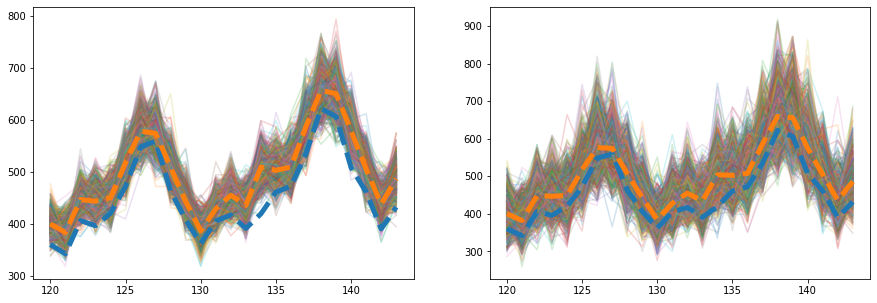

In [616]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
for i in range(N_SAMPLES):
    ax[0].plot(x_test, prediction_1[i, :], alpha = 0.2)
    ax[1].plot(x_test, prediction_2[i, :], alpha = 0.2)
ax[0].plot(x_test, data_test, '--', lw = 5)
ax[1].plot(x_test, data_test, '--', lw = 5)
ax[0].plot(x_test, best_prediction, '--', lw = 5)
ax[1].plot(x_test, best_prediction2, '--', lw = 5)

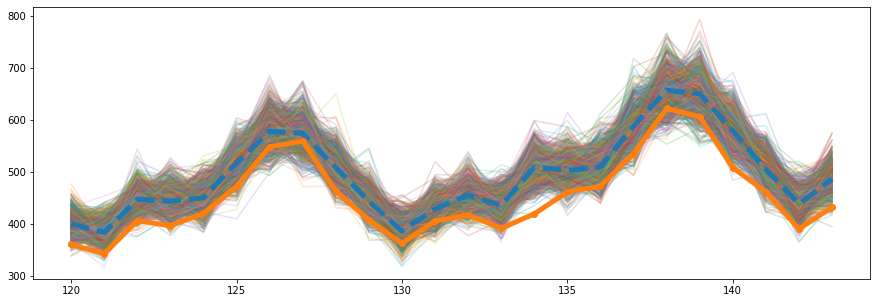

In [620]:
fig, ax = plt.subplots(figsize=(15,5))
#ax.plot(x_train, data_train)

for i in range(N_SAMPLES):
    ax.plot(x_test, prediction_1[i, :], alpha = 0.2)
ax.plot(x_test, best_prediction, '--', lw = 5)
ax.plot(x_test, data_test, '-o', lw=5)

In [530]:
err_gen

array([[-0.03780642,  0.01981631, -0.08471017, ..., -0.00409517,
         0.09431897, -0.01447805],
       [ 0.04196465,  0.08125868,  0.01791767, ...,  0.05256656,
         0.00106951, -0.06490286],
       [ 0.03109282,  0.0414887 , -0.03347537, ...,  0.024929  ,
         0.0164796 , -0.06939532],
       ...,
       [ 0.02329166, -0.08671784, -0.03193288, ..., -0.04527334,
        -0.027542  ,  0.01596424],
       [-0.00188892,  0.04696256, -0.1138009 , ...,  0.03072495,
        -0.17478648,  0.04780834],
       [ 0.07533101, -0.00209211,  0.02738612, ...,  0.03221861,
         0.03911677, -0.00159917]])

In [621]:
a = [1, 2, 3]
b = [4, 5, 6]
c = [7, 8, 9]
abc = np.array([a, b, c])

In [622]:
d = np.array([10, 0, 1])
abc + d

array([[11,  2,  4],
       [14,  5,  7],
       [17,  8, 10]])

In [551]:
np.apply_along_axis(sum, 0, abc)

array([12, 15, 18])

In [623]:
# Intervalos de confianza

a = np.random.normal(loc = 0, scale = 2, size = 1000000)
b = a[np.where((a>-4)&(a <4))]
len(b)

953801

In [758]:
#Libreria descomp

from statsmodels.tsa.seasonal import seasonal_decompose

In [759]:
dec = seasonal_decompose(np.log(data_train), model = 'additive')

In [760]:
dec.resid.dropna(inplace = True)

In [763]:
df = pd.DataFrame({'trend' : dec.trend.values.squeeze(), 'xtrain' : x_train.squeeze()})

In [764]:
df.dropna(inplace = True)

In [772]:
mu2, sigma2 = scipy.stats.norm.fit(dec.resid)

In [780]:
errgenerated = np.random.normal(mu2, sigma2, size = (N_SAMPLES * 1000, x_test.size))

In [767]:
from sklearn.linear_model import LinearRegression
modell = LinearRegression()
modell.fit(np.array(df['xtrain']).reshape(-1,1), np.array(df['trend']).reshape(-1,1))
trendy = modell.predict(x_test)
trendxx = modell.predict(x_train)

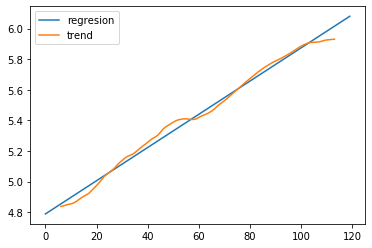

In [768]:
fig, ax = plt.subplots()
ax.plot(x_train, trendxx, label='regresion')
ax.plot(x_train, dec.trend, label='trend')
plt.legend()

In [781]:
prediction_method = np.exp(pd.DataFrame(errgenerated).apply(np.mean, axis = 0).values
+ dec.seasonal.values[:x_test.size].squeeze() + trendy.squeeze())

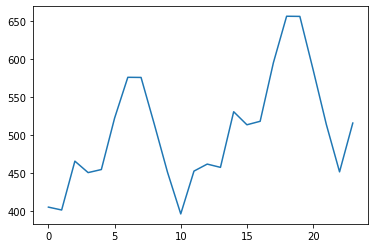

In [782]:
plt.plot(prediction_method)

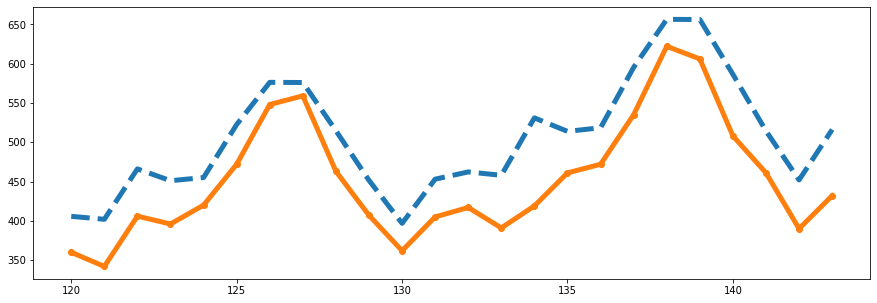

In [783]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x_test, prediction_method, '--', lw = 5)
ax.plot(x_test, data_test, '-o', lw=5)

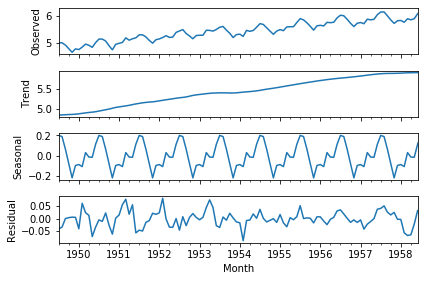

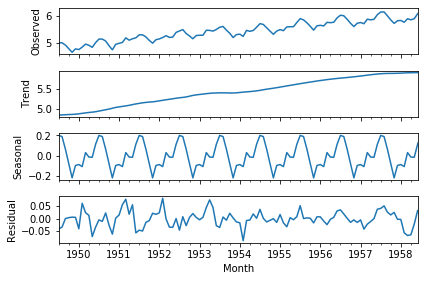

In [771]:
dec.plot()

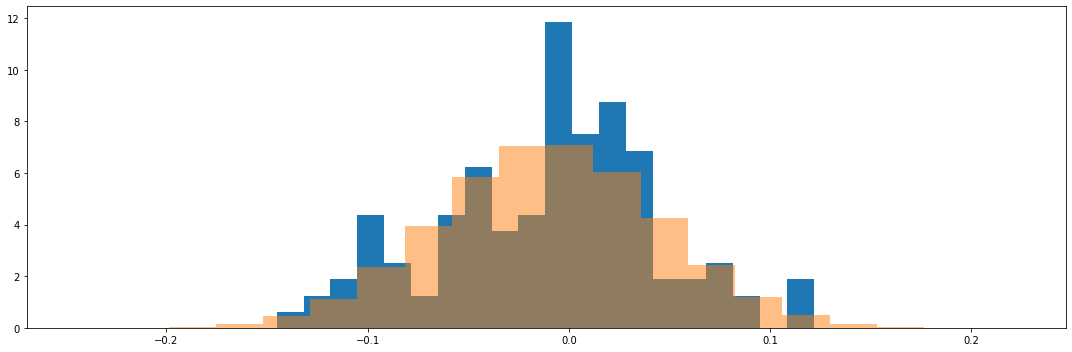

In [757]:
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(error, bins = 20, density = True, alpha = 1)
ax.hist(np.random.normal(mu, sigma, size = x_train.size * 1000), bins = 20, density = True, alpha= 0.5)
plt.tight_layout()

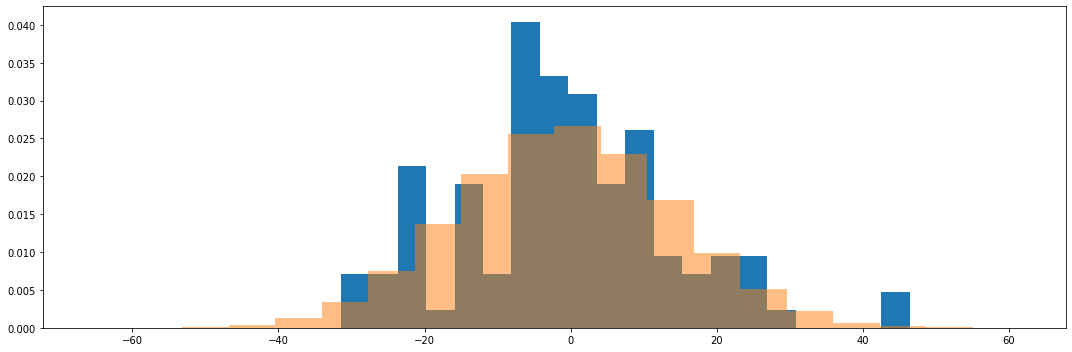

In [659]:
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(dec.resid.values, bins = 20, density = True, alpha = 1)
ax.hist(np.random.normal(mu2, sigma2, size = x_train.size * 1000), bins = 20, density = True, alpha= 0.5)
plt.tight_layout()